In [1]:
import random 
random.seed(123)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import operator as op
import seaborn as sns


In [2]:
data = pd.read_csv("dataset.txt",sep=";")
data.head()

/tmp/ipykernel_358538/987010488.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset.txt",sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [4]:
missing = ['Sub_metering_3']
for i in missing:
    data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()


In [5]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [6]:
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)
data.replace(['?', 'nan', np.nan], -1, inplace=True) 
num_col= ['Global_active_power', 'Global_reactive_power', 'Voltage', 
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in num_col:
    data[i] = pd.to_numeric(data[i])

In [7]:
for i in num_col:
    mean_ = data.loc[:,i].mean()
    data.loc[data.loc[:,i] == -1,i]=mean_

In [8]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
data.corr()

/tmp/ipykernel_358538/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247031,-0.397305,0.998888,0.484401,0.434569,0.638553
Global_reactive_power,0.247031,1.000000,-0.110175,0.266119,0.123105,0.139225,0.089608
Voltage,-0.397305,-0.110175,1.000000,-0.408948,-0.194863,-0.166440,-0.266718
Global_intensity,0.998888,0.266119,-0.408948,1.000000,0.489298,0.440347,0.626542
Sub_metering_1,0.484401,0.123105,-0.194863,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139225,-0.166440,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638553,0.089608,-0.266718,0.626542,0.102571,0.080872,1.000000


In [10]:
#Dropping data whose year is <2006
data = data[pd.DatetimeIndex(data['Date']).year > 2006]

/tmp/ipykernel_358538/957297215.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = data[pd.DatetimeIndex(data['Date']).year > 2006]


In [11]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
21996,1/1/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
21997,1/1/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
21998,1/1/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
21999,1/1/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
22000,1/1/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [12]:
models = {}
df1 = data
df1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
21996,1/1/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
21997,1/1/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
21998,1/1/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
21999,1/1/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
22000,1/1/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


# Data Preprocessing

In [13]:
def preprocess(filename):

    data = pd.read_csv(filename, sep=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, header=1,
                       names=['Date',
                              'Time',
                              'Active_Power',
                              'Reactive_Power',
                              'Voltage',
                              'Current',
                              'Meter_1',
                              'Meter_2',
                              'Meter_3'])

    # Cleans up data by removing null values with mean and dropping extra columns
    # Needed to save space
#     data = data.drop(columns=['Reactive_Power', 'Voltage', 'Current'])

    data['Active_Power'] = pd.to_numeric(data['Active_Power'], errors='coerce')
    data['Meter_1'] = pd.to_numeric(data['Meter_1'], errors='coerce')
    data['Meter_2'] = pd.to_numeric(data['Meter_2'], errors='coerce')
    data['Meter_3'] = pd.to_numeric(data['Meter_3'], errors='coerce')
    data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
    data['Current'] = pd.to_numeric(data['Current'], errors='coerce')

    data['Active_Power'].fillna(data['Active_Power'].mean(), inplace=True)
    data['Meter_1'].fillna(data['Meter_1'].mean(), inplace=True)
    data['Meter_2'].fillna(data['Meter_2'].mean(), inplace=True)
    data['Meter_3'].fillna(data['Meter_3'].mean(), inplace=True)
    data['Voltage'].fillna(data['Voltage'].mean(), inplace=True)
    data['Current'].fillna(data['Current'].mean(), inplace=True)
    
    

    # Aggregate Power over an hour duration
    data.set_index('Datetime', inplace=True)
    data = data.resample('h').sum()

    # Split Datetime Column
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    data['Hour'] = data.index.hour

    data.reset_index(inplace=True)
    data.drop(columns='Datetime', inplace=True)

    return data

In [14]:
dataset = "./dataset.txt"
data = preprocess(dataset)

/tmp/ipykernel_358538/3419393909.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, sep=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, header=1,
/tmp/ipykernel_358538/3419393909.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('h').sum()


In [15]:
x = data.drop('Active_Power',axis=1)
y = data['Active_Power']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.7, random_state = 10)

# Linear Regression

In [19]:
def prediction(X_train,Y_train,X_test,Y_test):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,Y_train)
    pred = lin_reg.predict(X_test)
    mse = skm.mean_squared_error(Y_test,pred,squared=False)
    #r2 = skm.r2_score(Y_test,pred)
    return [mse]

In [20]:
models["linear regression"] = prediction(X_train,Y_train,X_test,Y_test)

# Linear Regression With Ridge

In [21]:
def ridge_pred(X_train,Y_train,X_test,Y_test):
    ridge_reg = Ridge(alpha=0.001,normalize=True)
    ridge_reg.fit(X_train,Y_train)
    pred = ridge_reg.predict(X_test)
    mse = skm.mean_squared_error(Y_test,pred,squared=False)
    #r2 = skm.r2_score(Y_test,pred)
    return [mse]

In [22]:
models["Ridge Regression"] = ridge_pred(X_train,Y_train,X_test,Y_test)

/home/raghava/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


# Linear Regression With Lasso

In [23]:
def lasso_pred(X_train,Y_train,X_test,Y_test):
    lasso_reg = Lasso(alpha=0.1)
    lasso_reg.fit(X_train,Y_train)
    pred = lasso_reg.predict(X_test)
    mse = skm.mean_squared_error(Y_test,pred,squared=False)
    #r2 = skm.r2_score(Y_test,pred)
    return [mse]

In [24]:
models["Lasso regression"] = lasso_pred(X_train,Y_train,X_test,Y_test)

In [26]:
models_df = pd.DataFrame.from_dict(models,orient='index',columns=['Mse'])
models_df

,Mse
linear regression,1.422901
Ridge Regression,1.428097
Lasso regression,1.422648


# Feature Engineering

In [27]:
data

,Active_Power,Voltage,Current,Meter_1,Meter_2,Meter_3,Year,Month,Day,Hour
0,147.808,8212.34,633.2,0.0,18.0,590.0,2006,12,16,17
1,217.932,14074.81,936.0,0.0,403.0,1012.0,2006,12,16,18
2,204.014,13993.95,870.2,0.0,86.0,1001.0,2006,12,16,19
3,196.114,14044.29,835.0,0.0,0.0,1007.0,2006,12,16,20
4,183.388,14229.52,782.8,0.0,25.0,1033.0,2006,12,16,21
...,...,...,...,...,...,...,...,...,...,...
34584,103.554,14224.18,433.0,0.0,0.0,772.0,2010,11,26,17
34585,94.408,14251.91,397.2,0.0,0.0,0.0,2010,11,26,18
34586,99.560,14204.46,423.4,0.0,4.0,0.0,2010,11,26,19
34587,69.822,14363.76,294.8,0.0,64.0,0.0,2010,11,26,20


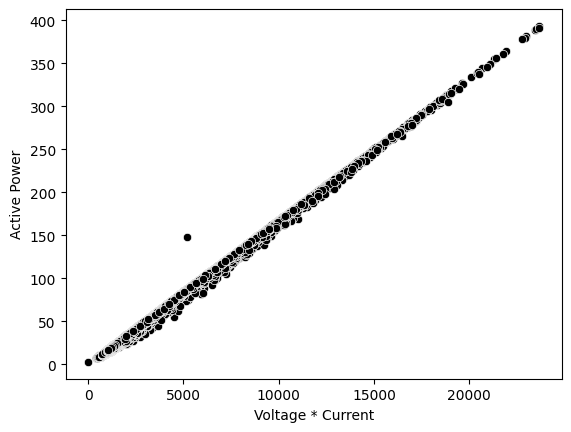

In [28]:
# Checking if data agrees with Voltage Power relationship
# Voltage * Current = Power

voltage = np.array(data["Voltage"])/1000.0 #Converting to kilo volt
current = np.array(data["Current"]) #current in ampere

VI = np.multiply(voltage, current)
power = np.array(data["Active_Power"])

ax = sns.scatterplot(x=VI, y=power, color='black')
ax.set(xlabel='Voltage * Current', ylabel='Active Power')
plt.show()


From the above graph, we can observe more linear relation between power and product of voltage and current. So we adding an extra feature to transpose our data into higher dimensions

In [36]:
data['VI'] = data['Voltage']*data['Current']/1000

In [30]:
#splitting the data into X_train, X_test, Y_train, Y_test
x = data.drop('Active_Power',axis=1)
y = data['Active_Power']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.7, random_state = 10)

# Applying linear regression models to new data

## Linear Regression:

In [31]:
def prediction(X_train,Y_train,X_test,Y_test):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,Y_train)
    pred = lin_reg.predict(X_test)
    mse = skm.mean_squared_error(Y_test,pred,squared=False)
    #r2 = skm.r2_score(Y_test,pred)
    return [mse]

In [32]:
models["linear regression on new data"] = prediction(X_train,Y_train,X_test,Y_test)

## Linear Regression with Ridge

In [33]:
# Linear Regression With Ridge

def ridge_pred(X_train,Y_train,X_test,Y_test):
    ridge_reg = Ridge(alpha=0.001,normalize=True)
    ridge_reg.fit(X_train,Y_train)
    pred = ridge_reg.predict(X_test)
    mse = skm.mean_squared_error(Y_test,pred,squared=False)
    #r2 = skm.r2_score(Y_test,pred)
    return [mse]

models["Ridge Regression on new data"] = ridge_pred(X_train,Y_train,X_test,Y_test)

/home/raghava/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


## Linear Regression with Lasso

In [34]:
def lasso_pred(X_train,Y_train,X_test,Y_test):
    lasso_reg = Lasso(alpha=0.1)
    lasso_reg.fit(X_train,Y_train)
    pred = lasso_reg.predict(X_test)
    mse = skm.mean_squared_error(Y_test,pred,squared=False)
    #r2 = skm.r2_score(Y_test,pred)
    return [mse]

models["Lasso regression on new data"] = lasso_pred(X_train,Y_train,X_test,Y_test)

/home/raghava/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.226e+04, tolerance: 7.014e+03
  model = cd_fast.enet_coordinate_descent(


In [35]:
models_df = pd.DataFrame.from_dict(models,orient='index',columns=['Mse'])
models_df

,Mse
linear regression,1.422901
Ridge Regression,1.428097
Lasso regression,1.422648
linear regression on new data,1.287720
Ridge Regression on new data,1.309946
Lasso regression on new data,1.377704
